# Regressão com Support Vector Regressor


- O que é o SVR?

O SVR tenta ajustar uma função (geralmente não linear) que prevê os valores da variável-alvo com base nas variáveis de entrada, garantindo que os desvios entre os valores previstos e os valores reais estejam dentro de uma margem de tolerância (chamada epsilon). Diferente de métodos tradicionais como regressão linear, o SVR se preocupa em minimizar o erro apenas para os pontos fora dessa margem, ignorando os que estão dentro dela.

In [22]:
#importando as bibliotecas necessarias para realizar a regressão
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Carregar os dados
df = pd.read_csv('data/diamonds.csv')

In [3]:
# Definindo as hierarquias das categorias
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Separar variáveis categóricas e numéricas
categorical_columns = ['cut', 'color', 'clarity']
numeric_columns = df.select_dtypes(include=["float64", "int64"]).drop(columns=["price"]).columns

# Separando variável dependente (price) e independentes
X = df.drop("price", axis=1)
y = df["price"]

In [ ]:
# Criando o pré-processamento para variáveis categóricas e numéricas dentro do ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),  # as variáveis numéricas são padronizadas para terem média 0 e desvio padrão 1. Isso é importante para modelos como o SVR, que são sensíveis à escala.
        ('cat', OrdinalEncoder(categories=[cut_order, color_order, clarity_order]), categorical_columns)  # Codifica as variáveis categóricas
    ])

# Criando o Pipeline com pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # Modelo SVM com kernel radial básico (RBF), que é adequado para detectar relações não lineares.
])

In [5]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo com o Pipeline
pipeline.fit(X_train, y_train)

# Avaliação do modelo
y_pred = pipeline.predict(X_test)

# Calculando MSE, RMSE e R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

RMSE: 2634.06
MSE: 6938259.41
R² Score: 0.56


# 1. Gráfico de dispersão: valores reais vs previstos

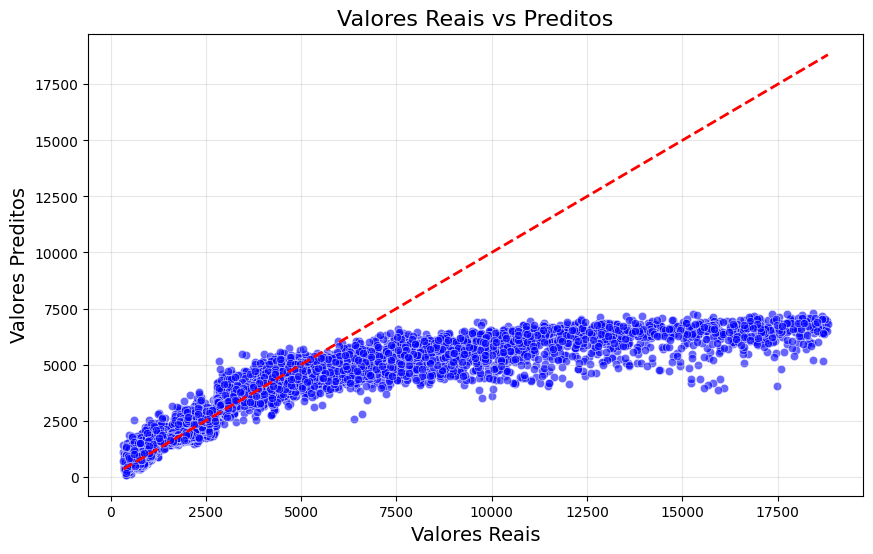

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Valores Preditos', fontsize=14)
plt.title('Valores Reais vs Preditos', fontsize=16)
plt.grid(alpha=0.3)
plt.show()

- Um bom modelo terá pontos próximos à linha diagonal vermelha, indicando que os valores previstos estão próximos aos reais.

# 2. Distribuição dos resíduos

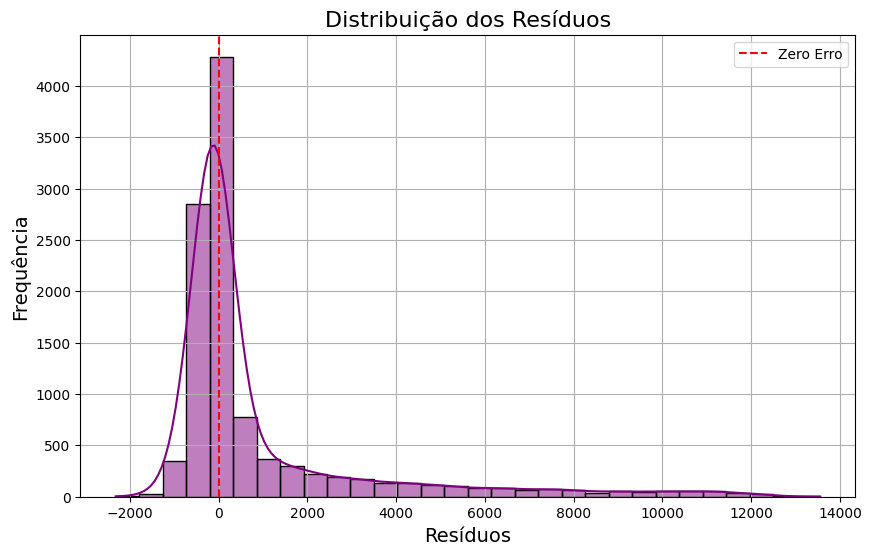

In [ ]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--', label='Zero Erro')
plt.xlabel('Resíduos', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Distribuição dos Resíduos', fontsize=16)
plt.legend()
plt.grid()
plt.show()

- Resíduos devem estar centralizados em torno de zero e ter uma distribuição simétrica. Desvios significativos podem indicar viés do modelo.

# 3. Erro absoluto vs valores reais

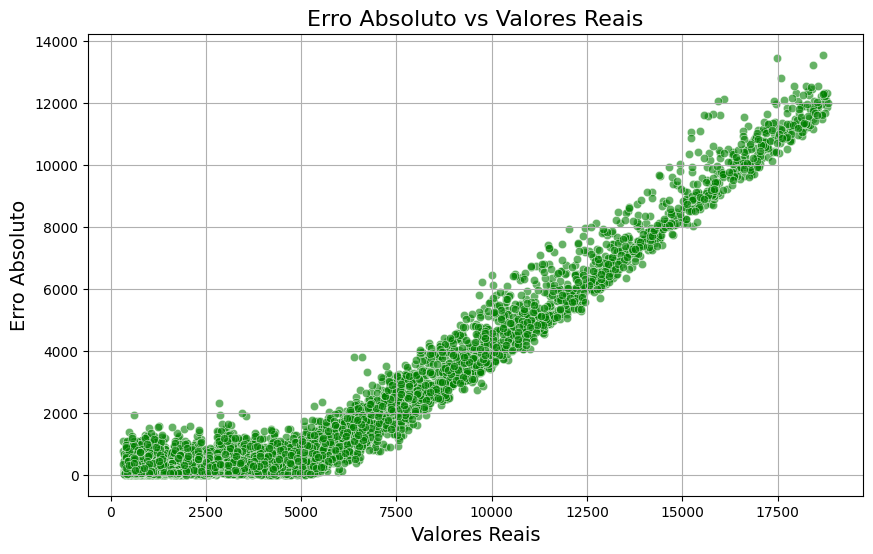

In [ ]:
erro_absoluto = np.abs(residuos)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=erro_absoluto, alpha=0.6, color='green')
plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Erro Absoluto', fontsize=14)
plt.title('Erro Absoluto vs Valores Reais', fontsize=16)
plt.grid()
plt.show()

- Um padrão crescente ou clusters podem indicar que o modelo não está funcionando bem para certos intervalos de valores reais.